Naïve Bayes Model

In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x_test=pd.read_csv("Data\X_test.csv")
x_train=pd.read_csv("Data\X_train.csv")
y_train=pd.read_csv("Data\y_train.csv")
y_test=pd.read_csv("Data\y_test.csv")

In [3]:
# Initialize and train the Naïve Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = nb_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

c:\Year 2\Sem 2\Machien Learning\Income_Prediction\.venv\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7884514435695538
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.80      0.95      0.87      7170
        >50K       0.66      0.30      0.41      2355

    accuracy                           0.79      9525
   macro avg       0.73      0.62      0.64      9525
weighted avg       0.77      0.79      0.76      9525



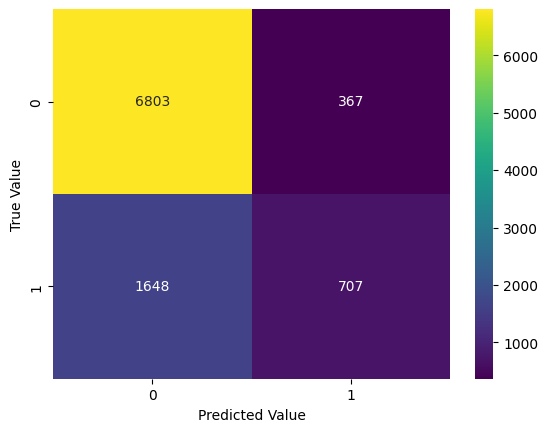

In [4]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()